![header](images/dcheader.png)

![header](images/2header.PNG)

In [9]:
import earthnet as entk
import xarray as xr
import s3fs
import numpy as np
import matplotlib.pyplot as plt

## Some example minicubes of the EarthNet2023 dataset (Cycle II final dataset)

You can of course choose whatever minicubes you want (eg. look for minicube IDs on [this map](https://www.earthnet.tech/earthnet2023_map.html)), but we also preselected a few that might be interesting:

`"36PZQ6711", "38PQS3309", "38PQS6426", "39NUJ4301", "38NNK3626", "39PVN4533"`

## [Explorer Map](https://www.earthnet.tech/earthnet2023_map.html)


In [10]:
# Loading one Minicube
mc = entk.load_minicube(dataset = "earthnet2023", split = "test", id = "36PZQ6711")

Searching for 36PZQ6711...
Found 36PZQ6711.


In [11]:
mc

<xarray.Dataset>
Dimensions:               (time: 2191, lon: 128, lat: 128, time_clim: 12)
Coordinates:
  * time                  (time) datetime64[ns] 2016-01-02 ... 2021-12-31
  * lon                   (lon) float64 36.5 36.5 36.5 ... 36.51 36.51 36.51
  * lat                   (lat) float64 8.903 8.903 8.903 ... 8.891 8.891 8.891
  * time_clim             (time_clim) datetime64[ns] 1970-01-15 ... 1970-12-15
Data variables: (12/72)
    s2_avail              (time) float32 ...
    s2_B02                (time, lat, lon) float32 ...
    s2_B03                (time, lat, lon) float32 ...
    s2_B04                (time, lat, lon) float32 ...
    s2_B05                (time, lat, lon) float32 ...
    s2_B06                (time, lat, lon) float32 ...
    ...                    ...
    sg_sand_top_mean      (lat, lon) float32 ...
    sg_sand_sub_mean      (lat, lon) float32 ...
    sg_silt_top_mean      (lat, lon) float32 ...
    sg_silt_sub_mean      (lat, lon) float32 ...
    sg_soc_top_mean       (lat, lon) float32 ...
    sg_soc_sub_mean       (lat, lon) float32 ...
Attributes:
    dataset_name:        EarthNet2023 - Africa
    dataset_name_short:  en23
    dataset_version:     v1.0
    description:         This is a minicube from the EarthNet2023 - Africa da...
    license:             \nLicense\nEarthNet2023 - Africa is shared under CC-...
    provided_by:         Max-Planck-Institute for Biogeochemistry

## Plotting

We are gonne plot some stuff now:)

In [4]:
rgb = mc[["s2_B04", "s2_B03", "s2_B02"]].to_array("band")
masked_rgb = rgb.where(mc.s2_mask < 1, np.NaN).sel(time = mc.s2_avail == 1)
seasonal_rgb = masked_rgb.resample(time="QS-DEC", skipna = True).median()

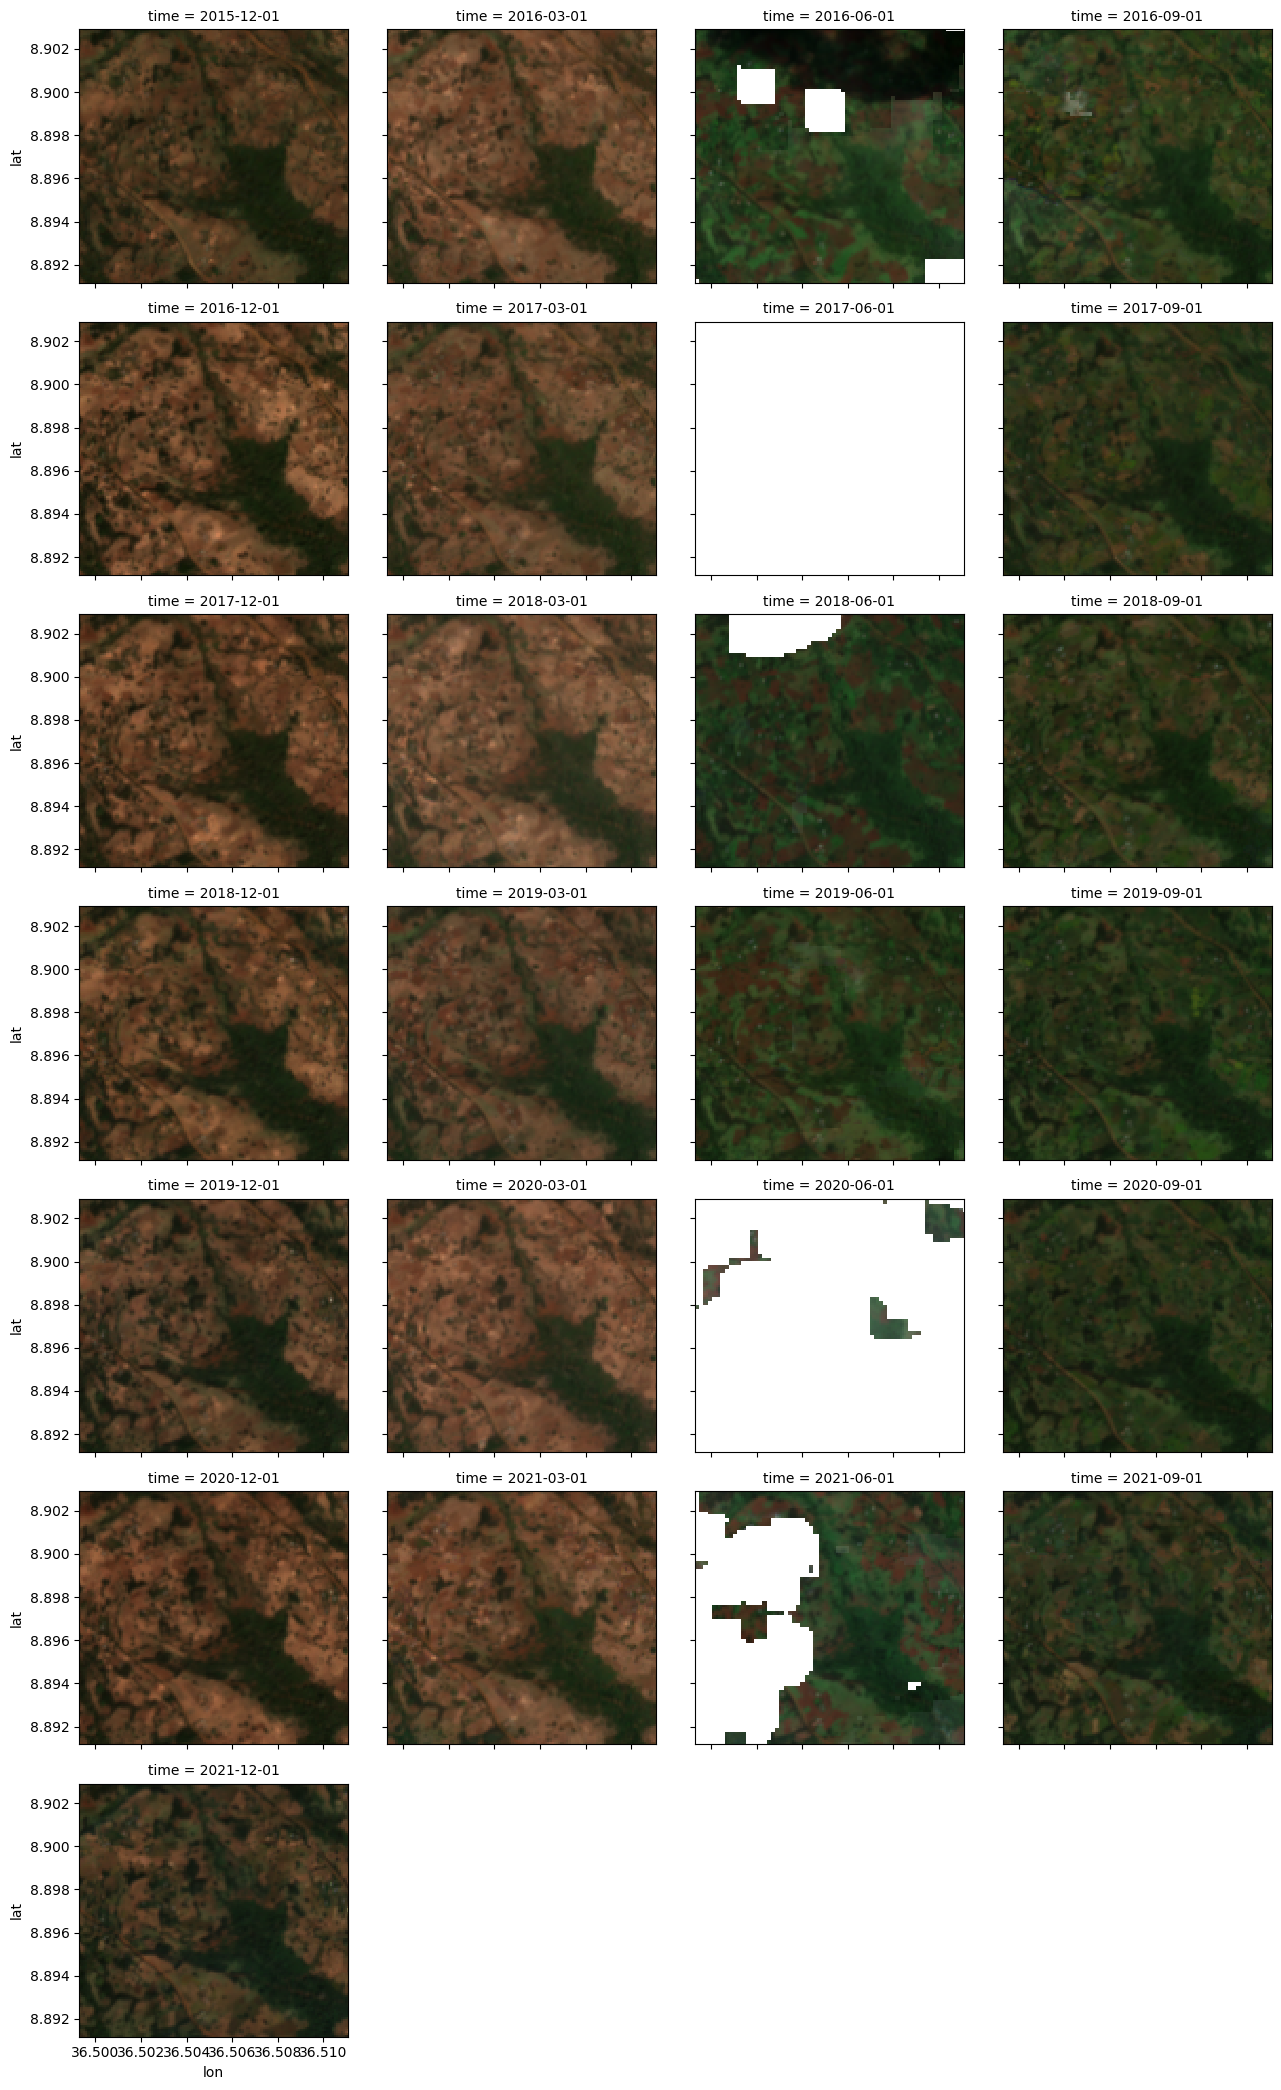

In [5]:
seasonal_rgb.plot.imshow(rgb = "band", col = "time", col_wrap = 4, vmin = 0.0, vmax = 0.3)
plt.show()

## Proxy for Vegetation

As a proxy for the vegetation we use the Normalized Difference Vegetation Index NDVI. It leverages the distinct reflective properties of sunlight in the red and near-infrared wavelengths of natural vegetation.

The NDVI is the target against which we are going to optimize.

In [6]:
red = mc.s2_B04
nir = mc.s2_B8A
ndvi = (nir - red) / (nir + red + 1e-8)
masked_ndvi = ndvi.where(mc.s2_mask < 1, np.NaN)
seasonal_ndvi = masked_ndvi.resample(time="QS-DEC", skipna = True).median()

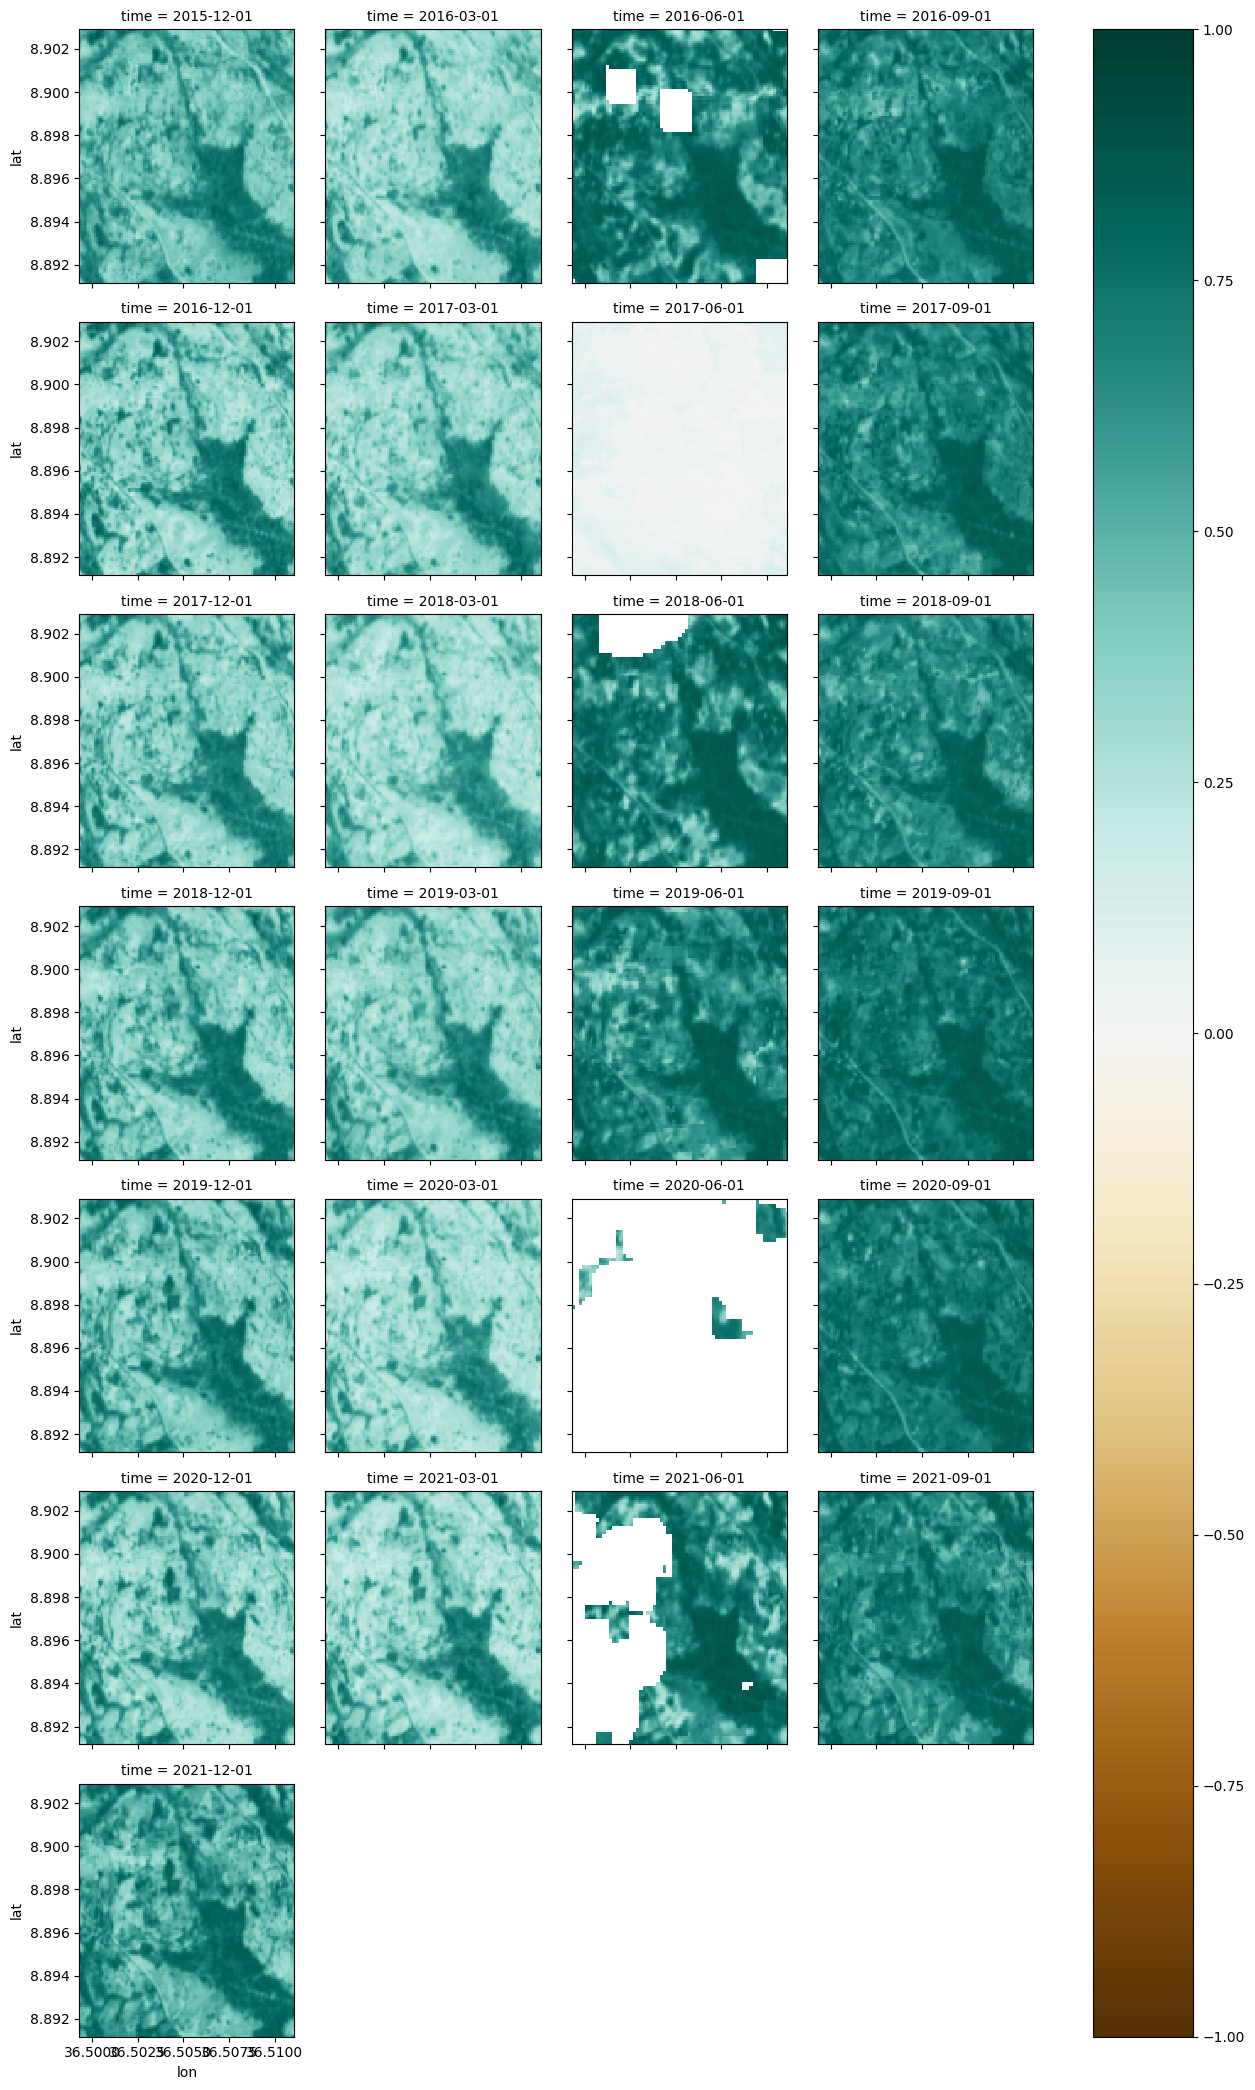

In [7]:
seasonal_ndvi.plot.imshow(col = "time", col_wrap = 4, vmin = -1.0, vmax = 1.0, cmap = "BrBG")
plt.show()

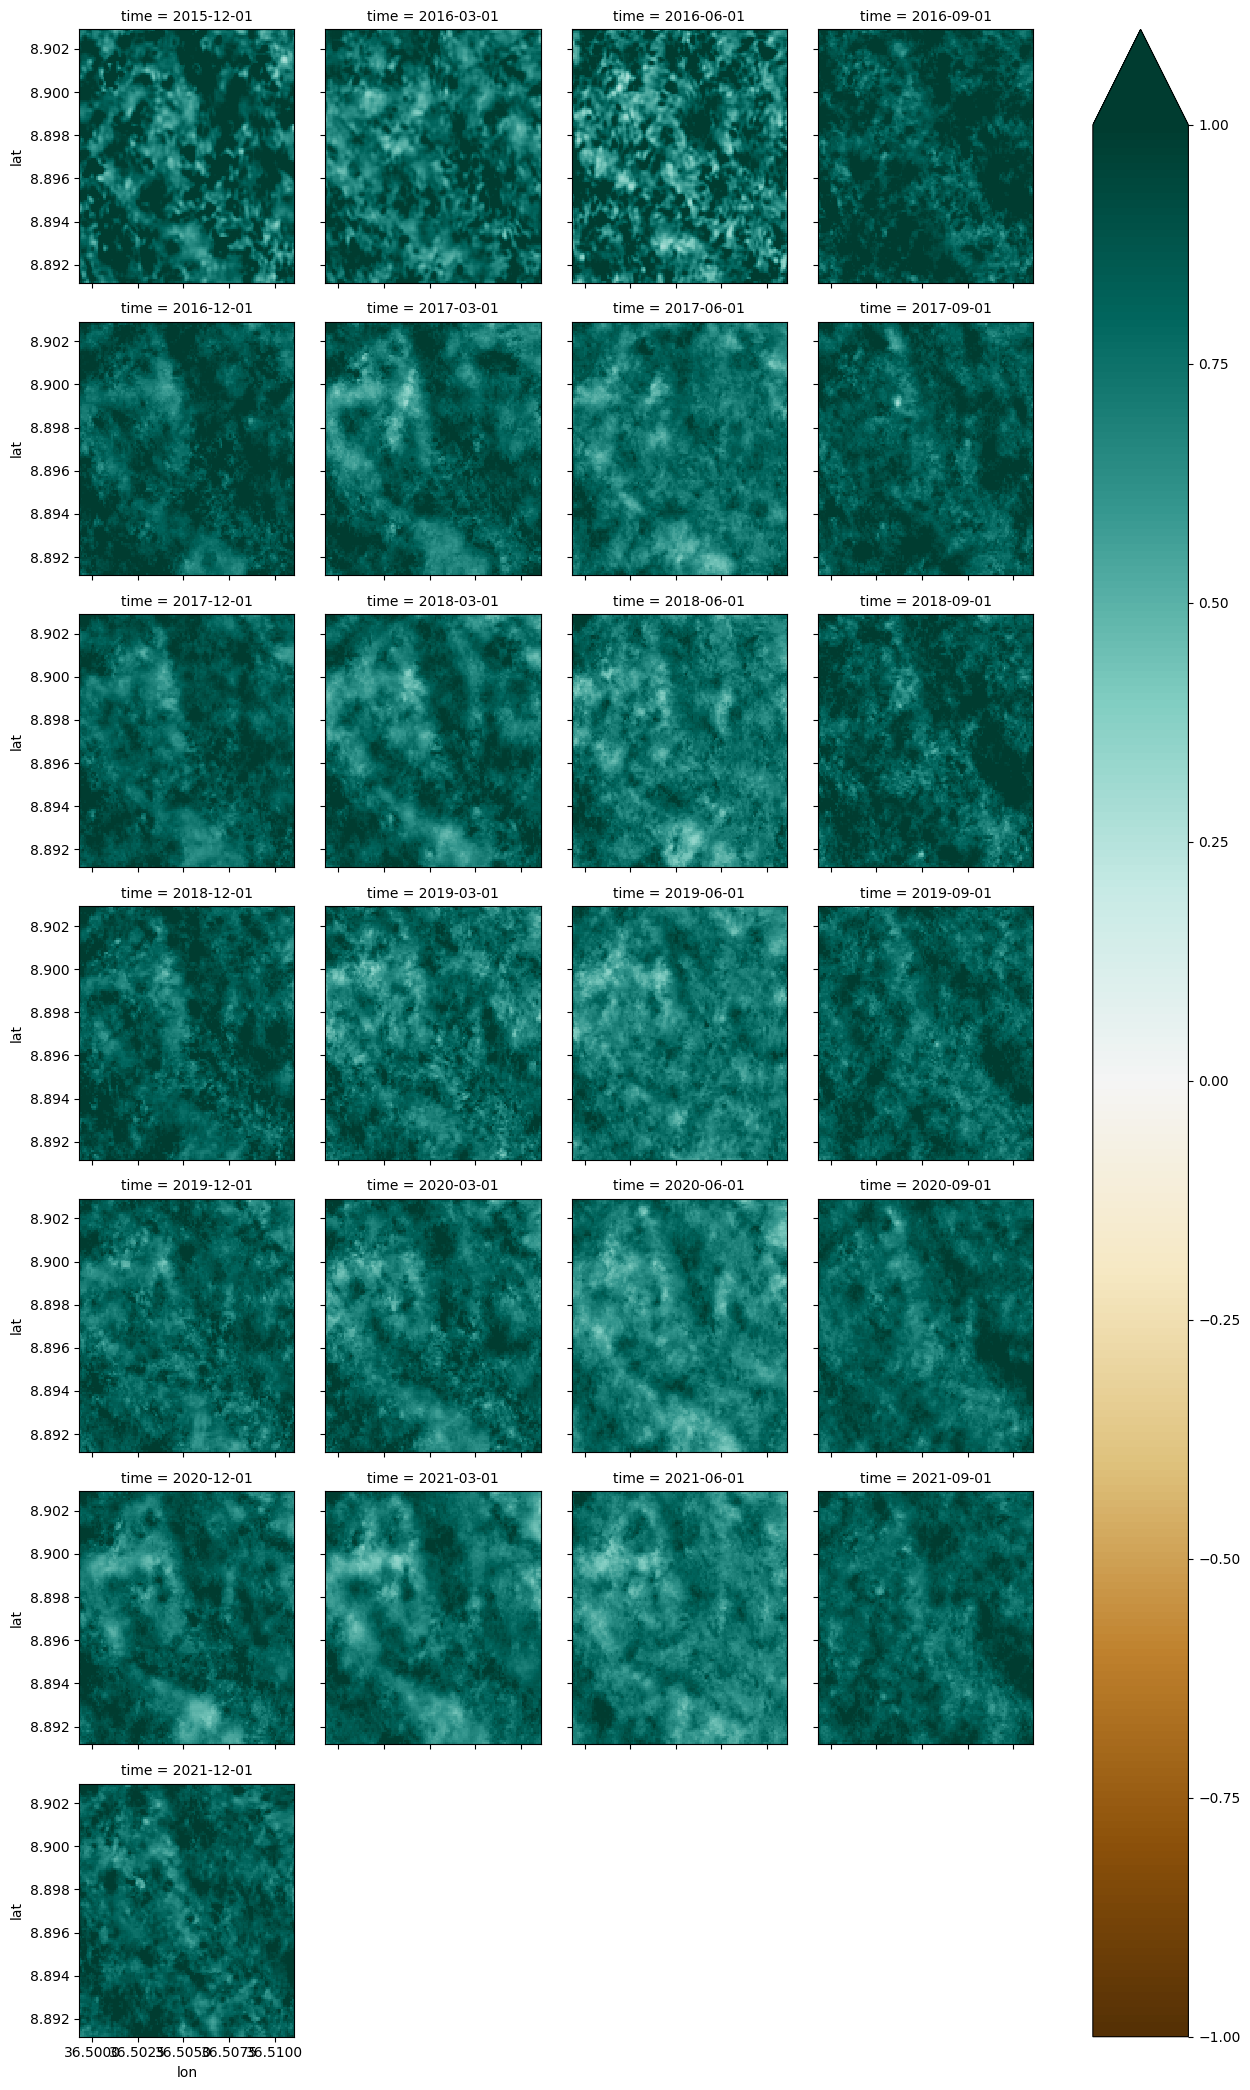

In [8]:
s1_veg_index = 4 * mc.s1_vh / (mc.s1_vh + mc.s1_vv)
seasonal_s1_veg_index = s1_veg_index.resample(time="QS-DEC", skipna = True).median()

seasonal_s1_veg_index.plot.imshow(col = "time", col_wrap = 4, vmin = -1.0, vmax = 1.0, cmap = "BrBG")
plt.show()